
#### IANNwTF WS2020/21
Clara Schier, Johanna Linkemeyer, Marisa Wodrich
# Homework 02

In this homework we implemented a Multi-Layer-Perceptron (MLP) which can be trained on logical gates. For the purpose of the hoemwork, we trained it on the XOR problem, however it can easily be adjusted and trained on other logical gates. 

### 1 Preparation

In [1]:
import numpy as np

We will use sigmoid as our activation function:

In [2]:
# sigmoid function
def sigmoid(x):
    return 1/(1 + np.exp(-x)) 

# first derivative of sigmoid function
def sigmoidprime(x):
    return sigmoid(x) * (1 - sigmoid(x))

### 2 Data Set

In [3]:
# possible inputs for our MLP
inputs = np.array([[0,0],[0,1],[1,0],[1,1]])

# labels / target values for different logical gates
# 0 = false ; 1 = true
t_and = np.array([0,0,0,1])
t_or = np.array([0,1,1,1])
t_nand = np.array([1,1,1,0])
t_nor = np.array([1,0,0,0])
t_xor = np.array([0,1,1,0])

### 3 Perceptron
Disclaimer: This class is to some extend based on the flipped classroom session and was adapted accordingly to fit the present task.

In [4]:
class Perceptron: 
    
    def __init__(self, input_units):
        
        self.input_units = input_units
        
        # draw random weights from standard normal distribution
        self.weights = np.random.randn(input_units)
        
        # draw random bias from standard normal distribution
        self.bias = np.random.randn()
        
        # set learning rate
        self.alpha = 1
        
        # initialize drive (will be changed during every forward step)
        self.drive = 0
        
        # initialzie inputs (will be changed during every forward step)
        self.inputs = 0
        
    def forward_step(self, inputs):
        
        # save the inputs to object variable
        self.inputs = inputs
        
        # calcultae drive: weight the inputs and add the bias
        self.drive =  self.weights @ inputs + self.bias
        
        return sigmoid(self.drive)
        
        
    def update(self, delta):
        
        # update weights
        self.weights -= self.alpha * delta * self.inputs
        
        # update bias
        self.bias -= self.alpha * delta
        

###### Update Step:

function for gradients: $\frac{\delta L}{\delta w_{ij}^{(l)}} = \delta_i^{(l)} a_j^{(l-1)}$

update function: $\theta_{new} = \theta_{old} - \alpha \bigtriangledown L_{\theta}$

### 4 Multi-Layer Perceptron

In [5]:
class MLP():
    
    def __init__(self):
        
        # initialize 1 hidden layer with 4 perceptrons
        # for our purpose of training logical gates, they will always have 2 inputs
        self.hidden_layer = [Perceptron(2),Perceptron(2),Perceptron(2),Perceptron(2)]
        
        # initialize 1 output neuron
        # it gets 4 inputs (i.e. from the neurons of the hidden layer)
        self.output_neuron = Perceptron(4)
        
        # initialzie inputs (will be changed during every forward step)
        self.inputs = 0
        
        # initialize output (will be changed during every forward step)
        self.output = 0
        
    def forward_step(self, inputs):
        
        # save current inputs
        self.inputs = inputs
        
        # perform forward step for each perceptron in hidden layer
        outputs_hidden_layer = np.asarray([perceptron.forward_step(self.inputs) for perceptron in self.hidden_layer])
        
        # reshape (in order to have the right format for further usage)
        outputs_hidden_layer = np.reshape(outputs_hidden_layer, newshape=(-1))
        
        # perfrom forward step on output perceptron
        # it takes the outputs from the hidden layer perceptrons as new inputs
        self.output = self.output_neuron.forward_step(outputs_hidden_layer)
        
        
    def backprop_step(self, label):
        
        # calculate error of the output neuron and update the perceptrons weights and its bias
        delta = - (label - self.output) * sigmoidprime(self.output_neuron.drive)
        self.output_neuron.update(delta)
        
        # calculate the error for perceptrons in the hidden layer and update their weights and biases
        for i, perceptron in enumerate(self.hidden_layer):
            
            delta_p = delta * self.output_neuron.weights[i] * sigmoidprime(perceptron.drive) 
            perceptron.update(delta_p)

###### Calculation of error 

for output neuron:
$\delta_i^{(l)} = - (t_i - y_i) \sigma'(d_i^{(N)})$

for hidden layer neurons:
$\delta_i^{(l)} = (\sum\limits_{k=1}^m \delta_k^{(l+1)}w_{ki}^{(l+1)})\sigma'(d_i^{(l)})$

with $\delta_i^{(l)}$ being the error term delta of a perceptron, $d_i$ being the drive, $w$ the weights, $t_i$ the target value (the label) and $y_i$ the output of the MLP.

### 5 Training

In this section we will initialize a MLP instance and train it on the XOR locigal gate for 1000 epochs.

In [6]:
# create MLP instance
mlp = MLP()

accuracies = [0] * 1000
losses = [0] * 1000

# train for 1000 epochs
for i in range(1000):
    
    loss = 0       # for average loss during this epoch
    accuracy = 0   # for average accuray during this epoch
    
    #during each epoch iterate over each data point
    for j in range(4):
        inp = inputs[j]
        target = t_xor[j]  # change 't_or' to train on other logical gate
        
        # perform one forward and one backward step to adjust parameters
        mlp.forward_step(inp)
        mlp.backprop_step(target)
    
        # calculate loss using squared error
        # muliply with 0.25 to get average
        loss += ((mlp.output - target)**2) * 0.25
        
        # calculate accuracy
        # 0.25 to get average
        if abs(mlp.output - target) < 0.5:
            accuracy += 0.25
    
    accuracies[i] = accuracy
    losses[i] = loss

### 6 Visualization

In [7]:
import matplotlib.pyplot as plt

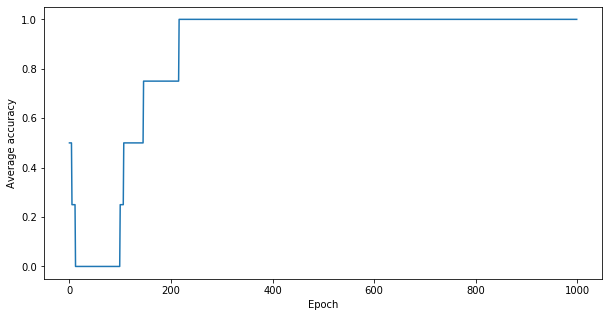

In [8]:
# plot the average accuracy for every epoch
plt.figure(figsize=(10,5))
plt.plot(accuracies)
plt.xlabel("Epoch")
plt.ylabel("Average accuracy")
plt.show()

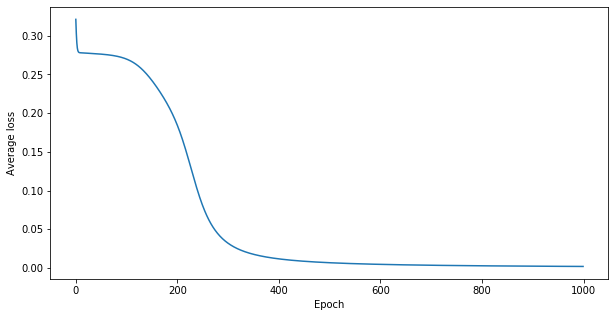

In [9]:
# plot the average loss for every epoch
plt.figure(figsize=(10,5))
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Average loss")
plt.show()